# Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста

### Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

##### Часть 1. Приоритизация гипотез
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

##### Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

##### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

##### Задача
Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:

 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.

### Описание данных

##### Данные для первой части:
Файл /datasets/hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

##### Данные для второй части:
Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


**Цель исследования:** 

1. Приоритизировать гипотезы, 
2. запустить A/B-тест,
3. проанализировать результаты. 


### Часть 1. Приоритизация гипотез

### Загрузка данных и подготовка их к анализу

Импорт нужных библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import numpy as np

C:\Users\79156\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Загружаем данные из файла /datasets/hypothesis.csv.

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведём названия столбцов к нижнему регистру.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis['ICE'] = hypothesis['ICE'].round(2)

hypothesis[['hypothesis', 'ICE']]. sort_values(by = 'ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Фреймворк ICE показал, что наиболее перспективные гипотезы:**
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis['RICE'] = hypothesis['RICE'].round(2)

hypothesis[['hypothesis', 'RICE']]. sort_values(by = 'RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Фреймворк RICE показал, что наиболее перспективные гипотезы:**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

#### Вывод: 
При применении RICE вместо ICE также лидируют гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Но отличие в том, что при RICE гипотеза "Запустить акцию, дающую скидку на товар в день рождения" теперь занимает в приоритете 5 место вместо 1. Так произошло, потому что параметр Reach в этой гипотезе равен 1, меньше, чем у других гипотез.

Также при RICE гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" занимет 2-ое место вместо 5-ого. Причинной является то, что её параметр Reach равен 8, в то время как у большинства других гипотез он меньше. Ещё одной причиной является то что её параметр Efforts равен 3, в то время как у большинства других гипотез он больше.

- Параметр Reach показывает скольких пользователей затронет изменение, которое вы хотите внести.
- Параметр Efforts показывает сколько стоит протестировать эту гипотезу, насколько сложно проверить гипотезу.

**Я рекомендую тестировать гипотезы в следующем порядке:**

**Первой: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.**

**Второй: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.**

**Третьей: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.**

### Часть 2. Анализ A/B-теста

### Загрузка данных и подготовка их к анализу

Загружаем данные из файлов: /datasets/orders.csv и /datasets/visitors.csv.

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

Выведем два датафрейма на экран.

In [8]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим типы данных.

In [9]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В датафреймах данные в столбце date изменим с object на datetime.

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Приведём название колонок в датафрейме orders к змеиному регистру.

In [11]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Проверим данные на явные дубликаты.

In [12]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Явных дубликатов нет.

Проверим данные на пропуски.

In [13]:
display(orders.isna().sum())
display(visitors.isna().sum())

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Пропусков в данных нет.

Проверим не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

In [14]:
orders.groupby('visitor_id')['group'].nunique().value_counts()

1    973
2     58
Name: group, dtype: int64

Есть 973 посетителя, у которых только одно уникальное значение в колонке 'group'. Они попали только в одну группу.
Но есть 58 посетителей, у которых два уникальных значения в колонке 'group'. Эти пользователи попали сразу в две группы: группу A и группу B. 

**Вывод:**

Ознакомился с данными.

Изменил тип данных с object на datetime в столбце date в датафреймах orders и visitors.

Явных дубликатов в данных нет. Пропусков также нет.

Проверил не попадают ли какие-то пользователи в обе группы. 973 посетителя попадают только в одну группу, 58 посетителей попадаю сразу в группу A и группу B.

### Проанализируем A/B-тест

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим корректно ли был содан датафрейм cumulativeData. Совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

In [16]:
print('Минимальная дата в исходном датафрейме:', orders['date'].min())
print('Максимальная дата в исходном датафрейме:', orders['date'].max())
print('Минимальная дата в датафрейме cumulativeData:', cumulativeData['date'].min())
print('Максимальная дата в датафрейме cumulativeData:', cumulativeData['date'].max())

Минимальная дата в исходном датафрейме: 2019-08-01 00:00:00
Максимальная дата в исходном датафрейме: 2019-08-31 00:00:00
Минимальная дата в датафрейме cumulativeData: 2019-08-01 00:00:00
Максимальная дата в датафрейме cumulativeData: 2019-08-31 00:00:00


Минимальная и максимальная даты в исходном и новом датафрейме одинаковые. Значит датафрейм cumulativeData создан корректно.

**Построим график кумулятивной выручки по группам**

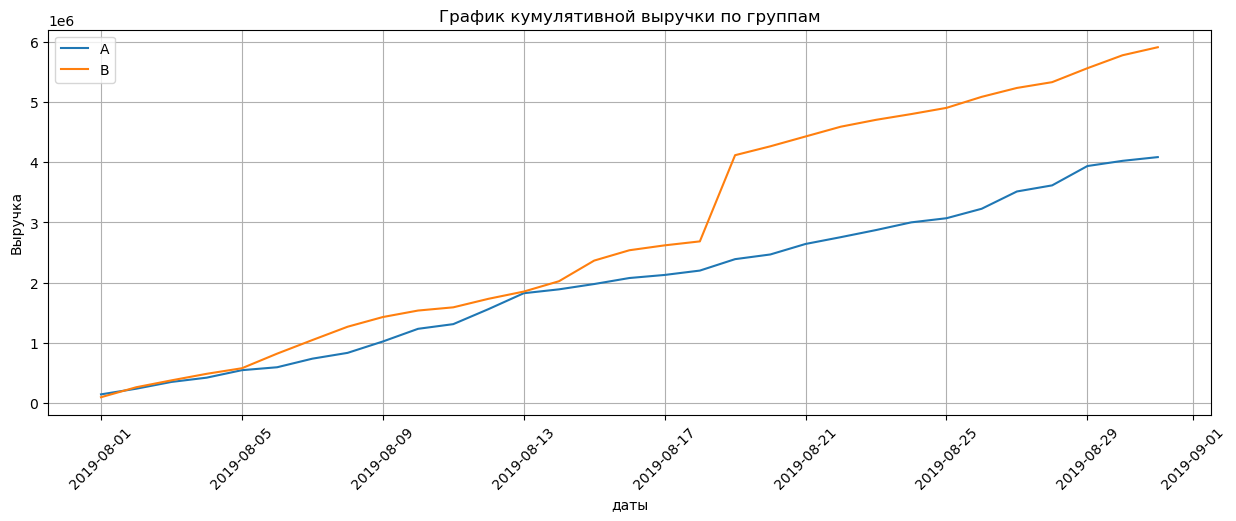

In [17]:
# датафрейм с кумулятивным количеством заказов, посетителей и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов, посетителей и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('даты')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Выручка увеличивается с каждым днём. Группа B лидируют на протяжении всего теста. Также есть точка, где выручка группы B резко выросла. Эта точка находится в середине теста. Возможно резкий рост выручки группы B связан с увеличением числа заказов или появились аномально дорогие заказы.

**Построим график кумулятивного среднего чека по группам**

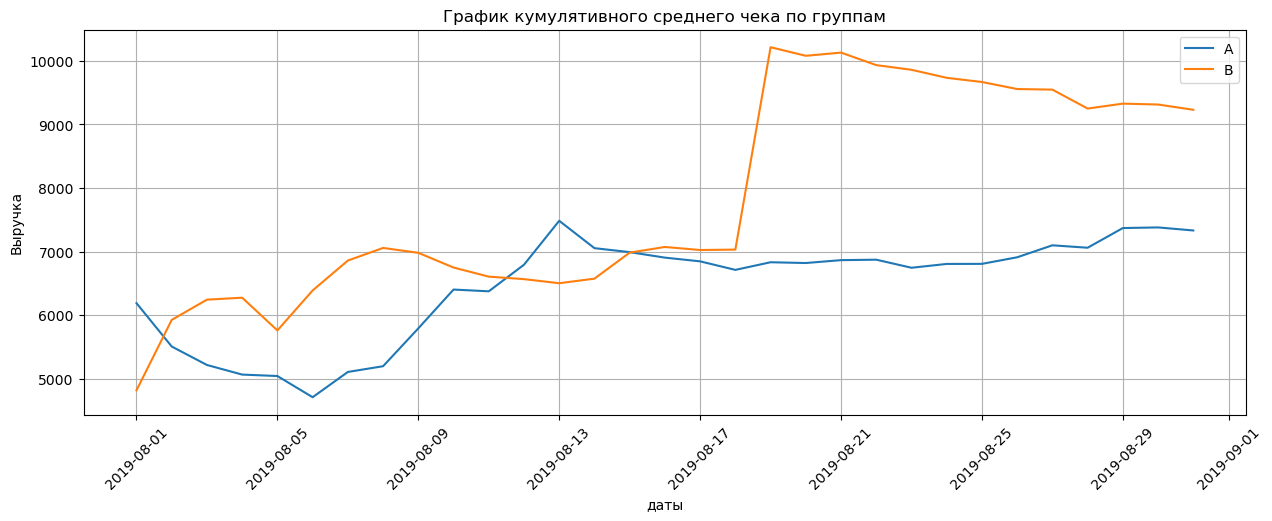

In [18]:
plt.figure(figsize=(15,5))

# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xlabel('даты')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

В середине теста был резкий скачок на графике у группы B, возможно это связано с тем, что в группу попали очень дорогие заказы.
К концу теста средний чек остановился на одном уровне для группы A и продолжает падать для группы B. Группе B нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

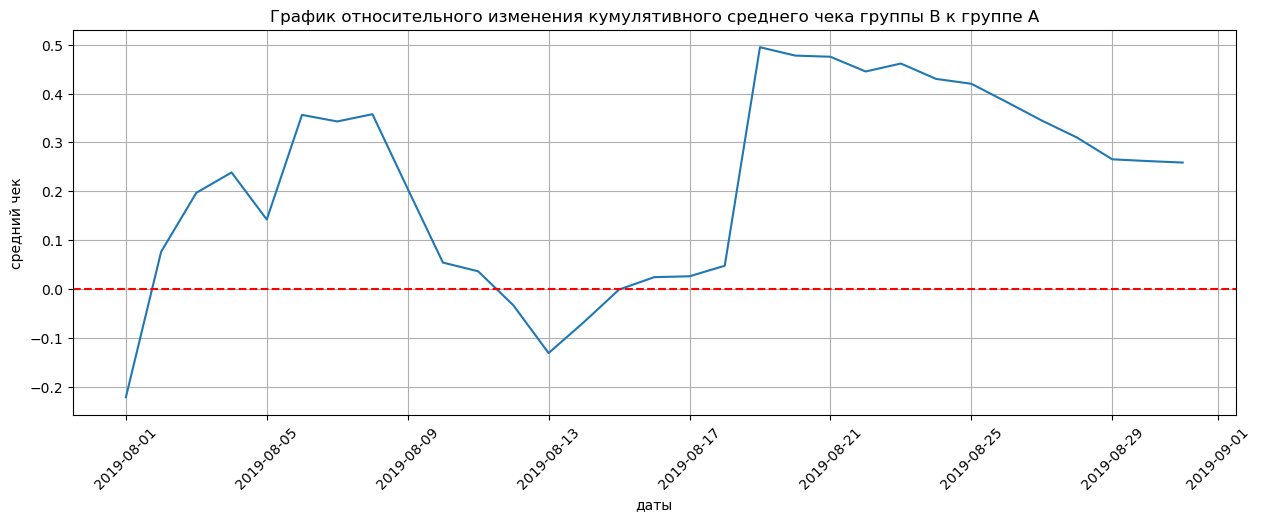

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--');

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('средний чек')
plt.xlabel('даты')
plt.xticks(rotation=45)
plt.grid()
plt.show()

График неравномерный, есть резкие скачки. Это говорит о том, что, действительно, есть дорогие заказы.

**Построим график кумулятивного среднего количества заказов на посетителя по группам**

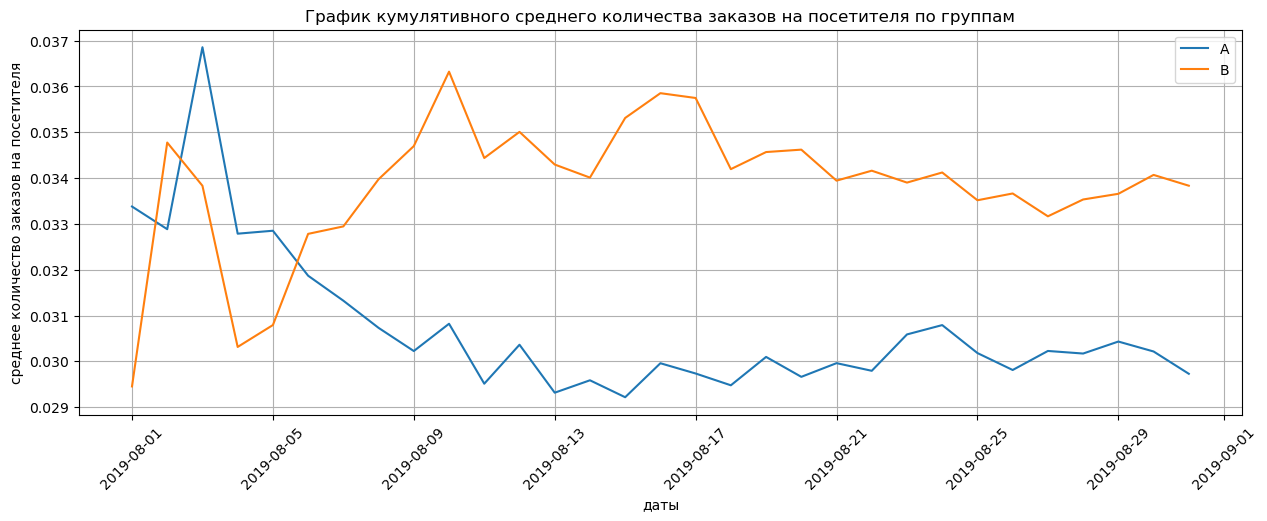

In [20]:
plt.figure(figsize=(15,5))

# разделим кумулятивное число заказов на кумулятивное число посетителей.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('среднее количество заказов на посетителя')
plt.xlabel('даты')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Среднее количество заказов на посетителя у группы B почти на всём протяжении теста лучше, чем у группы A. У группы A был резкий рост, а потом резкий спад вначале теста, далее группа A зафисиксировалась на уровне приблизительно в 0.03.
У группы B был также резкий рост среднего количества заказов на посетителя вначале теста. К концу теста среднее количество заказов на посетителя группы B зафиксировалась приблизительно на значении 0.034.

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

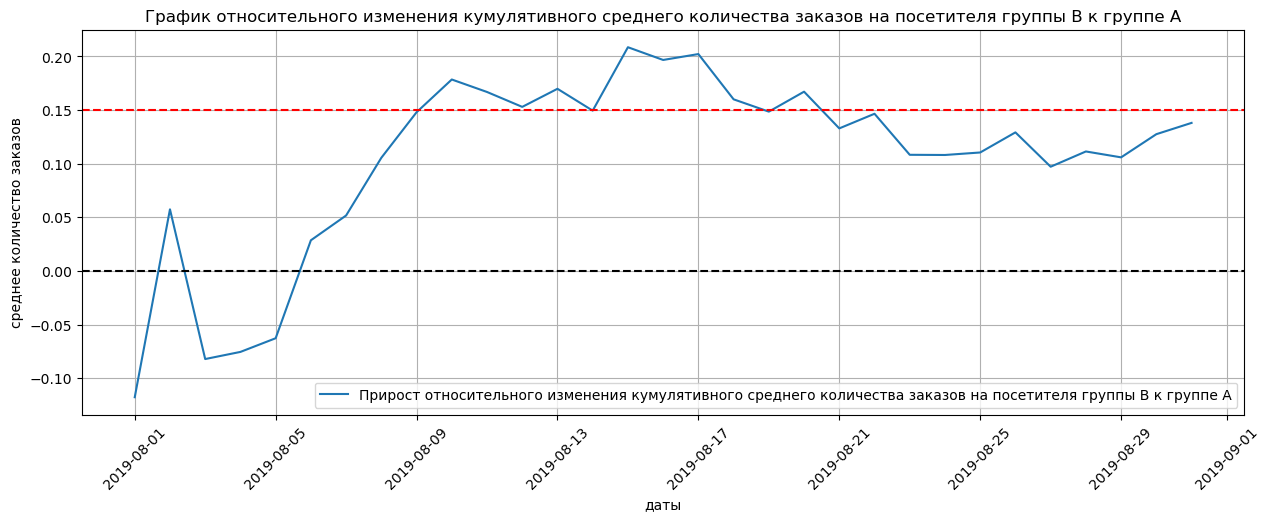

In [21]:
plt.figure(figsize=(15,5))

# cтроим отношение среднего количества заказов на посетителя группы B к группе A
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1, label="Прирост относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('среднее количество заказов')
plt.xlabel('даты')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

В начале теста группа B проигрывала группе A в относительном изменении кумулятивного среднего количества заказов на посетителя. Но далее группа B вырвалась вперёд, достигая прироста 15 - 20% относительно группы А.

**Построим точечный график количества заказов по пользователям**

In [22]:
#создаем таблицу по количеству заказов для каждого пользователя
orders_by_users = orders.groupby(
    'visitor_id', as_index=False).agg({'transaction_id':'nunique'})

orders_by_users.columns = ['transaction_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,transaction_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


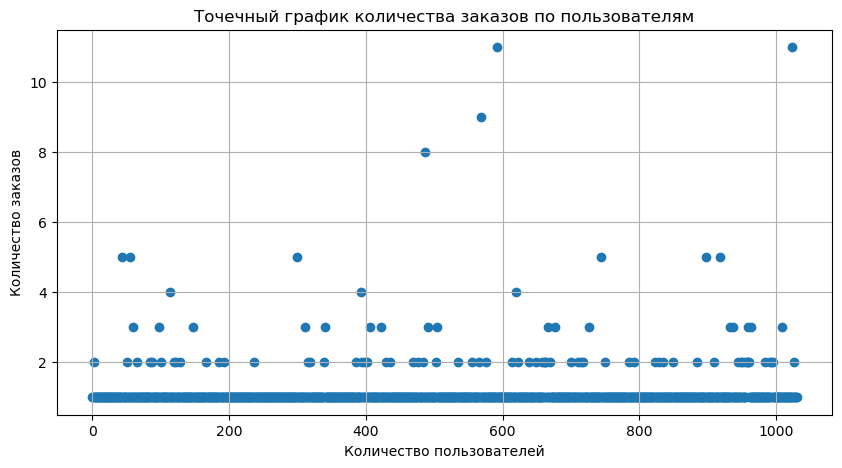

In [23]:
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0,len(orders_by_users['orders'])))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders_by_users['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()


Большинство пользователей сделали только по одному заказу. Есть также небольшое количество пользователей, сделавших 2-3 заказа. Пользователей, которые сделали больше 3 заказов очень мало.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

In [24]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершили больше двух заказов. И не более 1% пользователей - больше четырёх заказов.
Аномальные пользователи будут те, кто сделал больше 4 заказов.

Проверим количество аномальных пользователей

In [25]:
print('Аномальных пользователей:', len(orders_by_users[orders_by_users['orders'] > 4]))

Аномальных пользователей: 10


**Построим точечный график стоимостей заказов**

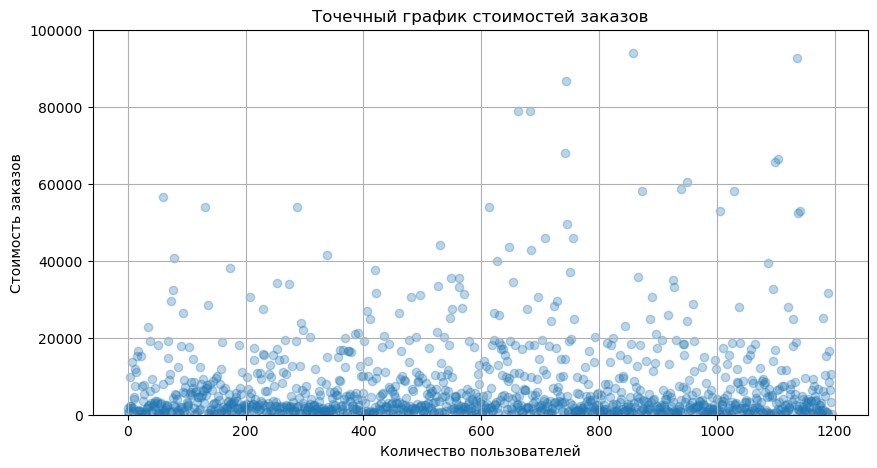

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.ylim(0, 100000)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Большинство пользователей делают заказы стоимостью до 20к. Малое количество делает заказы стоимость от 20к до 40к. И совсем единицы делают заказы дороже 40к.

**Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей совершили заказы дороже 28000. И не более 1% пользователей - дороже 58233,2.
Аномальные пользователи будут те, кто сделал заказы дороже дороже 58233,2.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Для начала создадим таблицу со следующими столбцами:

- date — дата
- ordersPerDateA — количество заказов в выбранную дату в группе A
- revenuePerDateA — суммарная выручка в выбранную дату в группе A
- ordersPerDateB — количество заказов в выбранную дату в группе B
- revenuePerDateB — суммарная выручка в выбранную дату в группе B
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B
- visitorsPerDateA — количество пользователей в выбранную дату в группе A
- visitorsPerDateB — количество пользователей в выбранную дату в группе B
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

cummulative.head() 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [30]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Нулевая гипотеза: среднее количество заказов на посетителя группы A = группе B(Статистически значимых различий в выборках нет, и сделать вывод о различии нельзя).

Альтернативная гипотеза: среднее количество заказов на посетителя группы A ≠ группе B(между выборками есть статистическая значимость).

Применим критерий Манна-Уитни. 

Alpha = 0.05.

In [31]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего количества заказов на посетителя группы B к группе A:','{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)) 

P-value: 0.017
Относительный прирост среднего количества заказов на посетителя группы B к группе A: 0.138


P-value меньше alpha, 0.017<0.05. Значит отвергаем нулевую гипотезу. Среднее количество заказов на посетителя группы A не равно группе B по сырым данным. Среднее количество заказов на посетителя в группе B больше, чем в группе A почти на 14%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**/

Нулевая гипотеза: средний чек группы A = среднему чеку группы B(Статистически значимых различий в выборках нет, и сделать вывод о различии нельзя).

Альтернативная гипотеза: средний чек группы A ≠ среднему чеку группы B(между выборками есть статистическая значимость).

Применим критерий Манна-Уитни. 

Alpha = 0.05.

In [32]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднечего чека группы B к группе A:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный прирост среднечего чека группы B к группе A: 0.259


P-value больше alpha, 0.729>0.05. Мы не можем отвергнуть нулевую гипотезу. Статистически значимых различий в среднем чеке заказа между группами A и B нет по сырым данным. Но средний чек заказа в группе B в среднем больше почти на 26%, чем в группе A.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

95-й и 99-й перцентили стоимости заказов равны 28000 и 58233.2. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. Будем считать аномальных пользователей тех, кто совершил более 4 заказов или совершил заказ на сумму больше 58233.2. Тогда мы уберём 1% пользователей с наибольшим числом и стоимостью заказов.

Для начала сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId']
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.shape[0])

C:\Users\79156\AppData\Local\Temp\ipykernel_12600\187081085.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
C:\Users\79156\AppData\Local\Temp\ipykernel_12600\187081085.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId']
C:\Users\79156\AppData\Local\Temp\ipykernel_12600\187081085.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element

15

Аномальных пользователей только 15.

Сделаем выборки количества заказов по пользователям по группам теста.

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Нулевая гипотеза: среднее количество заказов на посетителя группы A = группе B(Статистически значимых различий в выборках нет, и сделать вывод о различии нельзя).

Альтернативная гипотеза: среднее количество заказов на посетителя группы A ≠ группе B(между выборками есть статистическая значимость).

Применим критерий Манна-Уитни. 

Alpha = 0.05.

In [35]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов на посетителя группы B к группе A:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.014
Относительный прирост среднего количества заказов на посетителя группы B к группе A: 0.153


P-value меньше alpha, 0.014<0.05. Значит отвергаем нулевую гипотезу. Среднее количество заказов на посетителя группы A не равно группе B по очищенным данным. Среднее количество заказов на посетителя в группе B среднем больше, чем в группе A на 15%. Среднее количество заказов на посетителя по сравнению с сырыми данными практически не отличается, разница составляет 1.5 процентных пункта.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Нулевая гипотеза: средний чек группы A = среднему чеку группы B(Статистически значимых различий в выборках нет, и сделать вывод о различии нельзя).

Альтернативная гипотеза: средний чек группы A ≠ среднему чеку группы B(между выборками есть статистическая значимость).

Применим критерий Манна-Уитни. 

Alpha = 0.05.

In [36]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднечего чека группы B к группе A:',
    '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Относительный прирост среднечего чека группы B к группе A: -0.006


P-value больше alpha, 0.851>0.05. Мы не можем отвергнуть нулевую гипотезу. Статистически значимых различий в среднем чеке заказа между группами A и B нет по очищенным данным. Но средний чек заказа в группе A в среднем больше на 0.6%, чем в группе B.

В сырых данных средний чек группы B в среднем был выше на 26%, чем в группе A. По очищенным данным разницы в средних чеках практически нет, разница составляет 0.6%. Скорее всего на разницу повлияли выбросы.

## Решение по результатам теста

Принято решение - остановить тест.

Мы выясняли, что:
- Среднее количество заказов на посетителя группы A не равно группе B по сырым и по очищенным данным.
- Средний чек в группе A равен среднему чеку группы B по сырым и по очищенным данным.

### Итог:
У группы B больше среднее количество заказов на посетителя, чем у группы A.
Но средний чек у этих групп не имеет значимых различий.